## Digital & Social Media Analytics
### SUDHANSHU SHEKHAR LAL
------------------------------------------------------------------------------------------------------------------------------
## IMDB MOVIE REVIEW Using Keyword Exraction & Sentiment Analysis

In [1]:
!pip install keyBERT

from requests import get
from bs4 import BeautifulSoup
from warnings import warn
from time import sleep
from random import randint
import numpy as np, pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
import plotly.express as px
import re
import warnings
warnings.filterwarnings("ignore")



import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import nltk
from nltk.util import ngrams
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#from wordcloud import WordCloud
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scrapy.selector import Selector
from selenium import webdriver 
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm

import wordcloud
import matplotlib.pyplot as plt
from matplotlib import colors


Defaulting to user installation because normal site-packages is not writeable


In [2]:
pages = np.arange(1, 9951, 50)
headers = {'Accept-Language': 'en-US,en;q=0.8'}
url = 'https://www.imdb.com/search/title/?count=200&groups=top_100&sort=user_rating'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
iD = []
movie_name = []
rank = []
link = []
final_link = []
year = []
time = []
rating = []
genres = []
metascores = []
votes = []
gross = []

In [4]:
movie_data = soup.findAll('div', attrs= {'class': 'lister-item mode-advanced'})


In [5]:
for store in movie_data:
   
     
    #ids = store.a.find('img', class_='loadlate', attrs={'data-tconst'})
    #iD.append(ids)
    
    name = store.h3.a.text
    movie_name.append(name)
    
    genre = store.p.find("span",{"class":"genre"}).text.replace('\n','').strip()
    genres.append(genre)
    #movie_link = store.h3.findAll("a",
                             # attrs={'href': re.compile("^/title/")})  
    movie_link = store.h3.a['href']    
    link.append(movie_link)
    
    base_link = 'https://www.imdb.com' 
    tail_link = 'reviews/?ref_=tt_ql_urv'
    mid_link = ["".join([base_link, i]) for i in link]
    final_link = ["".join([j, tail_link]) for j in mid_link]
    
    year_released = store.h3.find('span', class_='lister-item-year text-muted unbold').text.replace('(','').replace('I ','').replace(')','')
    year.append(year_released)
    
    runtime = store.p.find('span',class_='runtime').text.replace(' min','')
    time.append(runtime)
    
    rate = store.find('div', class_='inline-block ratings-imdb-rating').text.replace('\n','')
    rating.append(rate)
    
    meta = store.find('span', class_='metascore').text.replace(' ','')if store.find('span',class_='metascore')else '0'
    metascores.append(meta)
    
    value = store.findAll('span', attrs={'name':"nv"})
    
    vote = value[0].text.replace(',', '')
    votes.append(vote)
    
   

In [6]:
movie_df = pd.DataFrame({'Name of movie': movie_name, 'Genre': genres, 'link Url': link, 'UserRev_Movie_Url': final_link, 'Year of release': year, 'Watchtime': time, 'Movie Rating': rating, 'Metascore': metascores, 'Votes': votes})
  

In [7]:
movie_df

,Name of movie,Genre,link Url,UserRev_Movie_Url,Year of release,Watchtime,Movie Rating,Metascore,Votes
0,The Shawshank Redemption,Drama,/title/tt0111161/,https://www.imdb.com/title/tt0111161/reviews/?...,1994,142,9.3,81,2691480
1,The Godfather,"Crime, Drama",/title/tt0068646/,https://www.imdb.com/title/tt0068646/reviews/?...,1972,175,9.2,100,1867146
2,The Dark Knight,"Action, Crime, Drama",/title/tt0468569/,https://www.imdb.com/title/tt0468569/reviews/?...,2008,152,9.0,84,2665189
3,Schindler's List,"Biography, Drama, History",/title/tt0108052/,https://www.imdb.com/title/tt0108052/reviews/?...,1993,195,9.0,94,1361148
4,The Godfather Part II,"Crime, Drama",/title/tt0071562/,https://www.imdb.com/title/tt0071562/reviews/?...,1974,202,9.0,90,1276943
...,...,...,...,...,...,...,...,...,...
95,Toy Story 3,"Animation, Adventure, Comedy",/title/tt0435761/,https://www.imdb.com/title/tt0435761/reviews/?...,2010,103,8.3,92,840999
96,Vertigo,"Mystery, Romance, Thriller",/title/tt0052357/,https://www.imdb.com/title/tt0052357/reviews/?...,1958,128,8.3,100,405438
97,North by Northwest,"Action, Adventure, Mystery",/title/tt0053125/,https://www.imdb.com/title/tt0053125/reviews/?...,1959,136,8.3,98,330882
98,Singin' in the Rain,"Comedy, Musical, Romance",/title/tt0045152/,https://www.imdb.com/title/tt0045152/reviews/?...,1952,103,8.3,99,245199


In [8]:
#final_link

In [9]:
movie_df.describe(include='all')

,Name of movie,Genre,link Url,UserRev_Movie_Url,Year of release,Watchtime,Movie Rating,Metascore,Votes
count,100,100,100,100,100,100,100,100,100
unique,100,57,100,100,57,68,10,40,100
top,The Shawshank Redemption,Drama,/title/tt0111161/,https://www.imdb.com/title/tt0111161/reviews/?...,1994,130,8.4,100,2691480
freq,1,7,1,1,5,4,29,6,1


In [10]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name of movie      100 non-null    object
 1   Genre              100 non-null    object
 2   link Url           100 non-null    object
 3   UserRev_Movie_Url  100 non-null    object
 4   Year of release    100 non-null    object
 5   Watchtime          100 non-null    object
 6   Movie Rating       100 non-null    object
 7   Metascore          100 non-null    object
 8   Votes              100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


In [11]:
movie_df['Watchtime'] = pd.to_numeric(movie_df['Watchtime'])
movie_df['Movie Rating'] = pd.to_numeric(movie_df['Movie Rating'])
movie_df['Metascore'] = pd.to_numeric(movie_df['Metascore'])
movie_df['Votes'] = pd.to_numeric(movie_df['Votes'])
 

In [12]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name of movie      100 non-null    object 
 1   Genre              100 non-null    object 
 2   link Url           100 non-null    object 
 3   UserRev_Movie_Url  100 non-null    object 
 4   Year of release    100 non-null    object 
 5   Watchtime          100 non-null    int64  
 6   Movie Rating       100 non-null    float64
 7   Metascore          100 non-null    int64  
 8   Votes              100 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 7.2+ KB


In [13]:
movie_df

,Name of movie,Genre,link Url,UserRev_Movie_Url,Year of release,Watchtime,Movie Rating,Metascore,Votes
0,The Shawshank Redemption,Drama,/title/tt0111161/,https://www.imdb.com/title/tt0111161/reviews/?...,1994,142,9.3,81,2691480
1,The Godfather,"Crime, Drama",/title/tt0068646/,https://www.imdb.com/title/tt0068646/reviews/?...,1972,175,9.2,100,1867146
2,The Dark Knight,"Action, Crime, Drama",/title/tt0468569/,https://www.imdb.com/title/tt0468569/reviews/?...,2008,152,9.0,84,2665189
3,Schindler's List,"Biography, Drama, History",/title/tt0108052/,https://www.imdb.com/title/tt0108052/reviews/?...,1993,195,9.0,94,1361148
4,The Godfather Part II,"Crime, Drama",/title/tt0071562/,https://www.imdb.com/title/tt0071562/reviews/?...,1974,202,9.0,90,1276943
...,...,...,...,...,...,...,...,...,...
95,Toy Story 3,"Animation, Adventure, Comedy",/title/tt0435761/,https://www.imdb.com/title/tt0435761/reviews/?...,2010,103,8.3,92,840999
96,Vertigo,"Mystery, Romance, Thriller",/title/tt0052357/,https://www.imdb.com/title/tt0052357/reviews/?...,1958,128,8.3,100,405438
97,North by Northwest,"Action, Adventure, Mystery",/title/tt0053125/,https://www.imdb.com/title/tt0053125/reviews/?...,1959,136,8.3,98,330882
98,Singin' in the Rain,"Comedy, Musical, Romance",/title/tt0045152/,https://www.imdb.com/title/tt0045152/reviews/?...,1952,103,8.3,99,245199


In [14]:
movie_df.describe()

,Watchtime,Movie Rating,Metascore,Votes
count,100.000000,100.000000,100.000000,1.000000e+02
mean,134.790000,8.518000,79.730000,9.328527e+05
std,30.892219,0.209559,19.907795,6.058748e+05
min,81.000000,8.300000,0.000000,4.611700e+04
25%,112.750000,8.400000,74.750000,4.040502e+05
50%,130.000000,8.500000,84.000000,8.676720e+05
75%,151.250000,8.600000,91.250000,1.298670e+06
max,229.000000,9.300000,100.000000,2.691480e+06


In [15]:
movie_df.shape

(100, 9)

In [16]:
#Checking Null values
movie_df.isnull().sum()

Name of movie        0
Genre                0
link Url             0
UserRev_Movie_Url    0
Year of release      0
Watchtime            0
Movie Rating         0
Metascore            0
Votes                0
dtype: int64

In [17]:
#Check for duplicate values
dup_data = movie_df.duplicated().any()
dup_data

False

In [18]:
movie_df.describe()

,Watchtime,Movie Rating,Metascore,Votes
count,100.000000,100.000000,100.000000,1.000000e+02
mean,134.790000,8.518000,79.730000,9.328527e+05
std,30.892219,0.209559,19.907795,6.058748e+05
min,81.000000,8.300000,0.000000,4.611700e+04
25%,112.750000,8.400000,74.750000,4.040502e+05
50%,130.000000,8.500000,84.000000,8.676720e+05
75%,151.250000,8.600000,91.250000,1.298670e+06
max,229.000000,9.300000,100.000000,2.691480e+06


In [19]:
movie_df.sort_values(by = 'Votes')

,Name of movie,Genre,link Url,UserRev_Movie_Url,Year of release,Watchtime,Movie Rating,Metascore,Votes
81,Tengoku to jigoku,"Crime, Drama, Mystery",/title/tt0057565/,https://www.imdb.com/title/tt0057565/reviews/?...,1963,143,8.4,90,46117
30,Seppuku,"Action, Drama, Mystery",/title/tt0056058/,https://www.imdb.com/title/tt0056058/reviews/?...,1962,133,8.6,85,58465
67,Idi i smotri,"Drama, Thriller, War",/title/tt0091251/,https://www.imdb.com/title/tt0091251/reviews/?...,1985,142,8.4,0,82112
73,Capharnaüm,Drama,/title/tt8267604/,https://www.imdb.com/title/tt8267604/reviews/?...,2018,126,8.4,75,91586
77,Witness for the Prosecution,"Crime, Drama, Mystery",/title/tt0051201/,https://www.imdb.com/title/tt0051201/reviews/?...,1957,116,8.4,76,127291
...,...,...,...,...,...,...,...,...,...
11,Forrest Gump,"Drama, Romance",/title/tt0109830/,https://www.imdb.com/title/tt0109830/reviews/?...,1994,142,8.8,82,2089909
9,Fight Club,Drama,/title/tt0137523/,https://www.imdb.com/title/tt0137523/reviews/?...,1999,139,8.8,66,2136936
8,Inception,"Action, Adventure, Sci-Fi",/title/tt1375666/,https://www.imdb.com/title/tt1375666/reviews/?...,2010,148,8.8,74,2364089
2,The Dark Knight,"Action, Crime, Drama",/title/tt0468569/,https://www.imdb.com/title/tt0468569/reviews/?...,2008,152,9.0,84,2665189


In [20]:
#top 5 most voted movies
for name in movie_df.sort_values(by = 'Votes', ascending = False).head()['Name of movie'].values:
    print(name)

The Shawshank Redemption
The Dark Knight
Inception
Fight Club
Forrest Gump


In [21]:
movie_df[movie_df['Watchtime']>=160]['Name of movie']

1                                         The Godfather
3                                      Schindler's List
4                                 The Godfather Part II
6         The Lord of the Rings: The Return of the King
10    The Lord of the Rings: The Fellowship of the Ring
12                      Il buono, il brutto, il cattivo
13                The Lord of the Rings: The Two Towers
18                                         Interstellar
21                                       The Green Mile
24                                  Saving Private Ryan
29                                 Shichinin no samurai
45                         Once Upon a Time in the West
53                                    Avengers: Endgame
56                                     Django Unchained
58                                The Dark Knight Rises
65                                              Amadeus
66                                           Braveheart
70                                             3

In [22]:
movie_df.nlargest(20,'Watchtime')

,Name of movie,Genre,link Url,UserRev_Movie_Url,Year of release,Watchtime,Movie Rating,Metascore,Votes
90,Once Upon a Time in America,"Crime, Drama",/title/tt0087843/,https://www.imdb.com/title/tt0087843/reviews/?...,1984,229,8.3,75,354965
93,Lawrence of Arabia,"Adventure, Biography, Drama",/title/tt0056172/,https://www.imdb.com/title/tt0056172/reviews/?...,1962,218,8.3,100,296554
29,Shichinin no samurai,"Action, Drama",/title/tt0047478/,https://www.imdb.com/title/tt0047478/reviews/?...,1954,207,8.6,98,348241
4,The Godfather Part II,"Crime, Drama",/title/tt0071562/,https://www.imdb.com/title/tt0071562/reviews/?...,1974,202,9.0,90,1276943
6,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",/title/tt0167260/,https://www.imdb.com/title/tt0167260/reviews/?...,2003,201,9.0,94,1854234
3,Schindler's List,"Biography, Drama, History",/title/tt0108052/,https://www.imdb.com/title/tt0108052/reviews/?...,1993,195,9.0,94,1361148
21,The Green Mile,"Crime, Drama, Fantasy",/title/tt0120689/,https://www.imdb.com/title/tt0120689/reviews/?...,1999,189,8.6,61,1308533
53,Avengers: Endgame,"Action, Adventure, Drama",/title/tt4154796/,https://www.imdb.com/title/tt4154796/reviews/?...,2019,181,8.4,78,1140185
13,The Lord of the Rings: The Two Towers,"Action, Adventure, Drama",/title/tt0167261/,https://www.imdb.com/title/tt0167261/reviews/?...,2002,179,8.8,87,1674399
10,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",/title/tt0120737/,https://www.imdb.com/title/tt0120737/reviews/?...,2001,178,8.8,92,1883780


In [23]:
#Top 20 Movies by Watchtime
top20_len = movie_df.nlargest(20,'Watchtime')[['Name of movie', 'Genre', 'UserRev_Movie_Url', 'Watchtime']]\
.set_index('Name of movie')


In [24]:
top20_len

,Genre,UserRev_Movie_Url,Watchtime
Name of movie,,,
Once Upon a Time in America,"Crime, Drama",https://www.imdb.com/title/tt0087843/reviews/?...,229
Lawrence of Arabia,"Adventure, Biography, Drama",https://www.imdb.com/title/tt0056172/reviews/?...,218
Shichinin no samurai,"Action, Drama",https://www.imdb.com/title/tt0047478/reviews/?...,207
The Godfather Part II,"Crime, Drama",https://www.imdb.com/title/tt0071562/reviews/?...,202
The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",https://www.imdb.com/title/tt0167260/reviews/?...,201
Schindler's List,"Biography, Drama, History",https://www.imdb.com/title/tt0108052/reviews/?...,195
The Green Mile,"Crime, Drama, Fantasy",https://www.imdb.com/title/tt0120689/reviews/?...,189
Avengers: Endgame,"Action, Adventure, Drama",https://www.imdb.com/title/tt4154796/reviews/?...,181
The Lord of the Rings: The Two Towers,"Action, Adventure, Drama",https://www.imdb.com/title/tt0167261/reviews/?...,179


In [25]:
movie_df['Genre'].value_counts()

Drama                           7
Crime, Drama                    7
Action, Adventure, Drama        5
Crime, Drama, Mystery           4
Drama, War                      3
Animation, Adventure, Comedy    3
Action, Adventure, Sci-Fi       3
Drama, Romance                  3
Action, Adventure, Fantasy      3
Action, Drama                   3
Comedy, Drama, Romance          3
Crime, Drama, Thriller          3
Animation, Action, Adventure    2
Mystery, Thriller               2
Action, Drama, Mystery          2
Animation, Adventure, Family    2
Biography, Drama, Music         2
Action, Crime, Drama            2
Action, Sci-Fi                  2
Biography, Drama, History       2
Crime, Drama, Fantasy           1
Adventure, Drama, War           1
Animation, Drama, Fantasy       1
Comedy, Drama                   1
Drama, Mystery, Thriller        1
Comedy, War                     1
Drama, Film-Noir                1
Comedy, Drama, War              1
Crime, Thriller                 1
Drama, Romance

In [26]:
movie_df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Biography, Drama, History', 'Action, Adventure, Drama',
       'Action, Adventure, Sci-Fi', 'Drama, Romance',
       'Adventure, Western', 'Biography, Crime, Drama', 'Action, Sci-Fi',
       'Action, Adventure, Fantasy', 'Adventure, Drama, Sci-Fi',
       'Crime, Drama, Mystery', 'Comedy, Drama, Romance',
       'Crime, Drama, Fantasy', 'Crime, Drama, Thriller', 'Drama, War',
       'Animation, Adventure, Family', 'Drama, Family, Fantasy',
       'Action, Drama', 'Action, Drama, Mystery', 'Drama, Music',
       'Drama, Thriller', 'Drama, Mystery, Sci-Fi', 'Drama, Mystery, War',
       'Horror, Sci-Fi', 'Adventure, Comedy, Sci-Fi',
       'Animation, Adventure, Drama', 'Biography, Drama, Music',
       'Biography, Comedy, Drama', 'Western', 'Drama, Romance, War',
       'Horror, Mystery, Thriller', 'Animation, Drama, War',
       'Mystery, Thriller', 'Action, Adventure', 'Drama, Western',
       'Drama, Horror', 'Animation,

In [27]:
movie_df['Genre']

0                            Drama
1                     Crime, Drama
2             Action, Crime, Drama
3        Biography, Drama, History
4                     Crime, Drama
                  ...             
95    Animation, Adventure, Comedy
96      Mystery, Romance, Thriller
97      Action, Adventure, Mystery
98        Comedy, Musical, Romance
99        Crime, Mystery, Thriller
Name: Genre, Length: 100, dtype: object

In [28]:
len(movie_df[movie_df['Genre'].str.contains('Action', case=False)])


24

In [29]:
list1= []
for value in movie_df['Genre']:
            list1.append(value.split(','))
          
list1

[['Drama'],
 ['Crime', ' Drama'],
 ['Action', ' Crime', ' Drama'],
 ['Biography', ' Drama', ' History'],
 ['Crime', ' Drama'],
 ['Crime', ' Drama'],
 ['Action', ' Adventure', ' Drama'],
 ['Crime', ' Drama'],
 ['Action', ' Adventure', ' Sci-Fi'],
 ['Drama'],
 ['Action', ' Adventure', ' Drama'],
 ['Drama', ' Romance'],
 ['Adventure', ' Western'],
 ['Action', ' Adventure', ' Drama'],
 ['Biography', ' Crime', ' Drama'],
 ['Action', ' Sci-Fi'],
 ['Drama'],
 ['Action', ' Adventure', ' Fantasy'],
 ['Adventure', ' Drama', ' Sci-Fi'],
 ['Crime', ' Drama', ' Mystery'],
 ['Comedy', ' Drama', ' Romance'],
 ['Crime', ' Drama', ' Fantasy'],
 ['Crime', ' Drama', ' Thriller'],
 ['Action', ' Adventure', ' Fantasy'],
 ['Drama', ' War'],
 ['Action', ' Sci-Fi'],
 ['Animation', ' Adventure', ' Family'],
 ['Crime', ' Drama'],
 ['Drama', ' Family', ' Fantasy'],
 ['Action', ' Drama'],
 ['Action', ' Drama', ' Mystery'],
 ['Drama', ' Music'],
 ['Drama', ' Thriller'],
 ['Drama', ' Mystery', ' Sci-Fi'],
 ['Crime'

In [30]:
one_d=[]
for item in list1:
    for item1 in item:
        one_d.append(item1)

In [31]:
one_d = [x.strip(' ') for x in one_d]
one_d

['Drama',
 'Crime',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Biography',
 'Drama',
 'History',
 'Crime',
 'Drama',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Western',
 'Action',
 'Adventure',
 'Drama',
 'Biography',
 'Crime',
 'Drama',
 'Action',
 'Sci-Fi',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Drama',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Mystery',
 'Comedy',
 'Drama',
 'Romance',
 'Crime',
 'Drama',
 'Fantasy',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Fantasy',
 'Drama',
 'War',
 'Action',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Family',
 'Crime',
 'Drama',
 'Drama',
 'Family',
 'Fantasy',
 'Action',
 'Drama',
 'Action',
 'Drama',
 'Mystery',
 'Drama',
 'Music',
 'Drama',
 'Thriller',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Crime',
 'Drama',
 'Action',
 '

In [32]:
unique_list=[]
for item in one_d:
    if item not in unique_list:
        unique_list.append(item)

In [33]:
unique_list

['Drama',
 'Crime',
 'Action',
 'Biography',
 'History',
 'Adventure',
 'Sci-Fi',
 'Romance',
 'Western',
 'Fantasy',
 'Mystery',
 'Comedy',
 'Thriller',
 'War',
 'Animation',
 'Family',
 'Music',
 'Horror',
 'Film-Noir',
 'Musical']

In [34]:
len(movie_df[movie_df['Genre'].str.contains('Action', case=False)])

24

In [35]:
len(movie_df[movie_df['Genre'].str.contains('Drama', case=False)])

70

In [36]:
len(movie_df[movie_df['Genre'].str.contains('Crime', case=False)])

20

In [37]:
from collections import Counter

In [38]:
#Finding which genre contains how many movies
Counter(one_d)

Counter({'Drama': 70,
         'Crime': 20,
         'Action': 24,
         'Biography': 7,
         'History': 2,
         'Adventure': 27,
         'Sci-Fi': 11,
         'Romance': 10,
         'Western': 3,
         'Fantasy': 6,
         'Mystery': 16,
         'Comedy': 12,
         'Thriller': 12,
         'War': 10,
         'Animation': 10,
         'Family': 3,
         'Music': 3,
         'Horror': 3,
         'Film-Noir': 1,
         'Musical': 1})

# Top 20 Movies by Genre and Rating

In [39]:
#Top 20 Action Movies
top20_Action = movie_df[movie_df['Genre'].str.contains('Action', case=False)][['Name of movie', 'Genre', 'UserRev_Movie_Url', 'Watchtime', 'Movie Rating', 'Votes']]
#.set_index('Name of movie')

top20_ActionRate = top20_Action.nlargest(20,'Movie Rating')
top20_ActionRate

,Name of movie,Genre,UserRev_Movie_Url,Watchtime,Movie Rating,Votes
2,The Dark Knight,"Action, Crime, Drama",https://www.imdb.com/title/tt0468569/reviews/?...,152,9.0,2665189
6,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",https://www.imdb.com/title/tt0167260/reviews/?...,201,9.0,1854234
8,Inception,"Action, Adventure, Sci-Fi",https://www.imdb.com/title/tt1375666/reviews/?...,148,8.8,2364089
10,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",https://www.imdb.com/title/tt0120737/reviews/?...,178,8.8,1883780
13,The Lord of the Rings: The Two Towers,"Action, Adventure, Drama",https://www.imdb.com/title/tt0167261/reviews/?...,179,8.8,1674399
15,The Matrix,"Action, Sci-Fi",https://www.imdb.com/title/tt0133093/reviews/?...,136,8.7,1921470
17,The Empire Strikes Back,"Action, Adventure, Fantasy",https://www.imdb.com/title/tt0080684/reviews/?...,124,8.7,1298320
23,Star Wars,"Action, Adventure, Fantasy",https://www.imdb.com/title/tt0076759/reviews/?...,121,8.6,1370815
25,Terminator 2: Judgment Day,"Action, Sci-Fi",https://www.imdb.com/title/tt0103064/reviews/?...,137,8.6,1104709
29,Shichinin no samurai,"Action, Drama",https://www.imdb.com/title/tt0047478/reviews/?...,207,8.6,348241


In [40]:
#Top 20 Adventure Movies by rating
top20_Adventure = movie_df[movie_df['Genre'].str.contains('Adventure', case=False)][['Name of movie', 'Genre', 'UserRev_Movie_Url', 'Watchtime', 'Movie Rating', 'Votes']]
#.set_index('Name of movie')
top20_AdventureRate = top20_Adventure.nlargest(20,'Movie Rating')
top20_AdventureRate

,Name of movie,Genre,UserRev_Movie_Url,Watchtime,Movie Rating,Votes
6,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",https://www.imdb.com/title/tt0167260/reviews/?...,201,9.0,1854234
8,Inception,"Action, Adventure, Sci-Fi",https://www.imdb.com/title/tt1375666/reviews/?...,148,8.8,2364089
10,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",https://www.imdb.com/title/tt0120737/reviews/?...,178,8.8,1883780
12,"Il buono, il brutto, il cattivo","Adventure, Western",https://www.imdb.com/title/tt0060196/reviews/?...,161,8.8,765530
13,The Lord of the Rings: The Two Towers,"Action, Adventure, Drama",https://www.imdb.com/title/tt0167261/reviews/?...,179,8.8,1674399
17,The Empire Strikes Back,"Action, Adventure, Fantasy",https://www.imdb.com/title/tt0080684/reviews/?...,124,8.7,1298320
18,Interstellar,"Adventure, Drama, Sci-Fi",https://www.imdb.com/title/tt0816692/reviews/?...,169,8.6,1846217
23,Star Wars,"Action, Adventure, Fantasy",https://www.imdb.com/title/tt0076759/reviews/?...,121,8.6,1370815
26,Sen to Chihiro no kamikakushi,"Animation, Adventure, Family",https://www.imdb.com/title/tt0245429/reviews/?...,125,8.6,769305
36,Gladiator,"Action, Adventure, Drama",https://www.imdb.com/title/tt0172495/reviews/?...,155,8.5,1507865


In [41]:
#Top 20 Drama Movies
top20_Drama = movie_df[movie_df['Genre'].str.contains('Drama', case=False)][['Name of movie', 'Genre', 'UserRev_Movie_Url', 'Watchtime', 'Movie Rating', 'Votes']]
#.set_index('Name of movie')
top20_DramaRate = top20_Drama.nlargest(20,'Movie Rating')
top20_DramaRate

,Name of movie,Genre,UserRev_Movie_Url,Watchtime,Movie Rating,Votes
0,The Shawshank Redemption,Drama,https://www.imdb.com/title/tt0111161/reviews/?...,142,9.3,2691480
1,The Godfather,"Crime, Drama",https://www.imdb.com/title/tt0068646/reviews/?...,175,9.2,1867146
2,The Dark Knight,"Action, Crime, Drama",https://www.imdb.com/title/tt0468569/reviews/?...,152,9.0,2665189
3,Schindler's List,"Biography, Drama, History",https://www.imdb.com/title/tt0108052/reviews/?...,195,9.0,1361148
4,The Godfather Part II,"Crime, Drama",https://www.imdb.com/title/tt0071562/reviews/?...,202,9.0,1276943
5,12 Angry Men,"Crime, Drama",https://www.imdb.com/title/tt0050083/reviews/?...,96,9.0,795129
6,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",https://www.imdb.com/title/tt0167260/reviews/?...,201,9.0,1854234
7,Pulp Fiction,"Crime, Drama",https://www.imdb.com/title/tt0110912/reviews/?...,154,8.9,2065573
9,Fight Club,Drama,https://www.imdb.com/title/tt0137523/reviews/?...,139,8.8,2136936
10,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",https://www.imdb.com/title/tt0120737/reviews/?...,178,8.8,1883780


In [42]:
#Top 20 Crime Movies
top20_Crime = movie_df[movie_df['Genre'].str.contains('Crime', case=False)][['Name of movie', 'Genre', 'UserRev_Movie_Url', 'Watchtime', 'Movie Rating', 'Votes']]
#.set_index('Name of movie')
top20_CrimeRate = top20_Crime.nlargest(20,'Movie Rating')
top20_CrimeRate

,Name of movie,Genre,UserRev_Movie_Url,Watchtime,Movie Rating,Votes
1,The Godfather,"Crime, Drama",https://www.imdb.com/title/tt0068646/reviews/?...,175,9.2,1867146
4,The Godfather Part II,"Crime, Drama",https://www.imdb.com/title/tt0071562/reviews/?...,202,9.0,1276943
5,12 Angry Men,"Crime, Drama",https://www.imdb.com/title/tt0050083/reviews/?...,96,9.0,795129
2,The Dark Knight,"Action, Crime, Drama",https://www.imdb.com/title/tt0468569/reviews/?...,152,9.0,2665189
7,Pulp Fiction,"Crime, Drama",https://www.imdb.com/title/tt0110912/reviews/?...,154,8.9,2065573
14,GoodFellas,"Biography, Crime, Drama",https://www.imdb.com/title/tt0099685/reviews/?...,145,8.7,1167750
19,Se7en,"Crime, Drama, Mystery",https://www.imdb.com/title/tt0114369/reviews/?...,127,8.6,1661387
21,The Green Mile,"Crime, Drama, Fantasy",https://www.imdb.com/title/tt0120689/reviews/?...,189,8.6,1308533
22,The Silence of the Lambs,"Crime, Drama, Thriller",https://www.imdb.com/title/tt0102926/reviews/?...,118,8.6,1439538
27,Cidade de Deus,"Crime, Drama",https://www.imdb.com/title/tt0317248/reviews/?...,130,8.6,760491


In [43]:
Anytop20_Movie_list = pd.DataFrame(top20_AdventureRate, columns=['Name of movie', 'UserRev_Movie_Url'])

In [44]:
Anytop20_Movie_list

,Name of movie,UserRev_Movie_Url
6,The Lord of the Rings: The Return of the King,https://www.imdb.com/title/tt0167260/reviews/?...
8,Inception,https://www.imdb.com/title/tt1375666/reviews/?...
10,The Lord of the Rings: The Fellowship of the Ring,https://www.imdb.com/title/tt0120737/reviews/?...
12,"Il buono, il brutto, il cattivo",https://www.imdb.com/title/tt0060196/reviews/?...
13,The Lord of the Rings: The Two Towers,https://www.imdb.com/title/tt0167261/reviews/?...
17,The Empire Strikes Back,https://www.imdb.com/title/tt0080684/reviews/?...
18,Interstellar,https://www.imdb.com/title/tt0816692/reviews/?...
23,Star Wars,https://www.imdb.com/title/tt0076759/reviews/?...
26,Sen to Chihiro no kamikakushi,https://www.imdb.com/title/tt0245429/reviews/?...
36,Gladiator,https://www.imdb.com/title/tt0172495/reviews/?...


In [45]:
review_df = pd.DataFrame(columns=['MovieName', 'Review'])

In [46]:
Review_List = []
PagesToLoad=1
for index,row in Anytop20_Movie_list.iterrows():
    driver = webdriver.Chrome('chromedriver.exe')
    driver.get(row['UserRev_Movie_Url'])
    
    wait = WebDriverWait(driver, (index+1)*20)
    load_more_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".ipl-load-more__button"))) # find the Load More button
    
    #button_exists = True # True value means that load more button exists
    #delay = 30 # delay time 30sec
    
    count=0
    while True: # repeat this process while load more button exists
        load_more_button.click() # click on Load More Button
        count=count+1
        try:
            if count < PagesToLoad:
                wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".ipl-load-more__button")))
            else:
                break;         
        except:
            break;
             
    FetchedReviews = driver.find_elements(By.CSS_SELECTOR, ".text.show-more__control")
    for review in FetchedReviews:
                dict={'MovieName':row['Name of movie'],
                      'Review':review.text
                      
                }            
                Review_List.append(dict) 
    #Close the driver
    driver.quit()
    

### Review Dataframe For Top 20 Movies by Genre:- Here it's 'Adventure'

In [47]:
review_df = pd.DataFrame(Review_List)
review_df

,MovieName,Review
0,The Lord of the Rings: The Return of the King,Best movie in the trilogy and sealed in the be...
1,The Lord of the Rings: The Return of the King,All the threads of Tolkien's magnum opus come ...
2,The Lord of the Rings: The Return of the King,Wonderful on every level. Love the characters ...
3,The Lord of the Rings: The Return of the King,The greatest tragedy of the human race is that...
4,The Lord of the Rings: The Return of the King,"I admit it, I love all three Lord of the Rings..."
...,...,...
494,Mononoke-hime,"Animals, their gods and humans clash in this f..."
495,Mononoke-hime,Im a Big fan of Miyazaki... This movie is Defi...
496,Mononoke-hime,Fantastic film! It makes me speechlessly. Good...
497,Mononoke-hime,When he is touching by a demon while defending...


In [48]:
Review_List

[{'MovieName': 'The Lord of the Rings: The Return of the King',
  'Review': 'Best movie in the trilogy and sealed in the best possible way'},
 {'MovieName': 'The Lord of the Rings: The Return of the King',
  'Review': 'All the threads of Tolkien\'s magnum opus come together in the most elegant of fashions in the final part of Peter Jackson\'s adaptation. Humanity makes a last stand at Minas Tirith, the Hobbits travel through Mordor, our heroes try to by time for Frodo to complete his mission and the Evil Sauron gets tired of the whole game and lashes out with all his might and fury.\n\n"Return of the King" is 4 hours of payoff, a third act in a gigantic epic rather than a mere film of its own. As such it is intensely dramatic and dynamic and you can very much sense that though peter Jackson spared no effort on the previous episodes, this is clearly his favorite. the film floats by at a thunderous pace, taking us through unforgettable moments such as the battle of Minas Tirith itself, a

In [49]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MovieName  499 non-null    object
 1   Review     499 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [50]:
review_df.isnull().sum()

MovieName    0
Review       0
dtype: int64

In [51]:
UniqueMovies = review_df['MovieName'].unique()
print(UniqueMovies)

['The Lord of the Rings: The Return of the King' 'Inception'
 'The Lord of the Rings: The Fellowship of the Ring'
 'Il buono, il brutto, il cattivo' 'The Lord of the Rings: The Two Towers'
 'The Empire Strikes Back' 'Interstellar' 'Star Wars'
 'Sen to Chihiro no kamikakushi' 'Gladiator' 'Back to the Future'
 'The Lion King' 'Avengers: Endgame' 'Raiders of the Lost Ark' 'Aliens'
 'Avengers: Infinity War' 'Spider-Man: Into the Spider-Verse' 'Coco'
 'WALL·E' 'Mononoke-hime']


### Taking Input from User to Select a Particular Movie from List of Movies 

In [52]:
UserInput = input("Enter Movie Name From Above:")

Enter Movie Name From Above:WALL·E


In [53]:
review_df[review_df['MovieName']==UserInput]

,MovieName,Review
449,WALL·E,Who says popular films are not and cannot be a...
450,WALL·E,
451,WALL·E,"To this day, this is still my favorite pixar f..."
452,WALL·E,Over the years I've become quite a sucker for ...
453,WALL·E,"I heard mixed reviews on WALL-E, there were th..."
454,WALL·E,
455,WALL·E,"I can't say enough about how good this movie, ..."
456,WALL·E,I just returned from an advanced benefit scree...
457,WALL·E,"In the Twentieth-Eighth Century, Earth is comp..."
458,WALL·E,


### Cleaning the DataFrame

In [54]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("'s")
stopwords.append("'m")
stopwords.append("n't")
stopwords.append("br")
stopwords.append("edu")
stopwords.append("use")

# this is a movie review dataset, so the word "movie" or "film "really doesn't give much sight
stopwords.append("movie")
stopwords.append("film")
stopwords.append("from")
stopwords.append("subject")
stopwords.append("re")



print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:11])

We use 190 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've"]


In [55]:
# Print out the NLTK default stopwords
print(f'There are {len(stopwords)} default stopwords. They are {stopwords}')

There are 190 default stopwords. They are ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'no

In [56]:
def clean_reviews(df):
    
    df["Review_clean"] = df["Review"].str.lower()  # convert reviews to lower-case
    df["Review_clean"] = df["Review_clean"].apply(lambda x: x.replace("\n","")) # remove new lines from reviews
    df["Review_clean"] = df["Review_clean"].apply(lambda x: x.replace(",","")) 
    df["Review_clean"] = df["Review_clean"].str.replace(r'[^\w\s]+', '') # remove punctuation from reviews
    df["Review_clean"] = df["Review_clean"].str.replace('\d+', '') # remove numbers from reviews
    df["Review_clean"] = df["Review_clean"].replace(r'http\S+', '', regex=True).replace(r'www\S+','',regex=True) # remove links from reviews
    df["Review_clean"] = df["Review_clean"].str.strip() # strip whitspaces
    df["Review_clean_no_stopwords"] = df["Review_clean"].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords])) # remove stopwords from reviews
    
    return df

cleaned_df = clean_reviews(review_df)

In [57]:
cleaned_df

,MovieName,Review,Review_clean,Review_clean_no_stopwords
0,The Lord of the Rings: The Return of the King,Best movie in the trilogy and sealed in the be...,best movie in the trilogy and sealed in the be...,best trilogy sealed best possible way
1,The Lord of the Rings: The Return of the King,All the threads of Tolkien's magnum opus come ...,all the threads of tolkiens magnum opus come t...,threads tolkiens magnum opus come together ele...
2,The Lord of the Rings: The Return of the King,Wonderful on every level. Love the characters ...,wonderful on every level love the characters a...,wonderful every level love characters special ...
3,The Lord of the Rings: The Return of the King,The greatest tragedy of the human race is that...,the greatest tragedy of the human race is that...,greatest tragedy human race never make better ...
4,The Lord of the Rings: The Return of the King,"I admit it, I love all three Lord of the Rings...",i admit it i love all three lord of the rings ...,admit love three lord rings films people may s...
...,...,...,...,...
494,Mononoke-hime,"Animals, their gods and humans clash in this f...",animals their gods and humans clash in this fa...,animals gods humans clash fantasy adventure fa...
495,Mononoke-hime,Im a Big fan of Miyazaki... This movie is Defi...,im a big fan of miyazaki this movie is definit...,im big fan miyazaki definitely top princess mo...
496,Mononoke-hime,Fantastic film! It makes me speechlessly. Good...,fantastic film it makes me speechlessly good d...,fantastic makes speechlessly good dialogs beau...
497,Mononoke-hime,When he is touching by a demon while defending...,when he is touching by a demon while defending...,touching demon defending village ashitaka sent...


In [58]:
ReviewFeeds=cleaned_df[cleaned_df['MovieName']==UserInput].Review_clean_no_stopwords.values.tolist()
ReviewFeeds

['says popular films cannot art anything proof popular films stunningly high quality beauty animation writing music sound design walle walle eclipses even andrew stantons toy story toy story pixar pantheon perhaps pixars best date call crazy ive seen contender title best animated periodwalle everything weve come expect pixar colorful vibrant imaginative exciting involving beautiful importantly interesting involving characters sure walle adorable much credit animators get would nothing without stantons screenplay features little dialogue still notably intelligent surprisingly subtle making refreshing change go green campaigns used walle message sure important message delivered subtly beautifullywalle operates two levels works spectacularly well majestic science fiction epic like havent seen couple decades genuinely touching never cheap romance walle never get points originality doesnt exactly need homages great films figures past chaplin keaton tati marx brothers space odyssey one parti

In [59]:
ReviewFeeds[:1]

['says popular films cannot art anything proof popular films stunningly high quality beauty animation writing music sound design walle walle eclipses even andrew stantons toy story toy story pixar pantheon perhaps pixars best date call crazy ive seen contender title best animated periodwalle everything weve come expect pixar colorful vibrant imaginative exciting involving beautiful importantly interesting involving characters sure walle adorable much credit animators get would nothing without stantons screenplay features little dialogue still notably intelligent surprisingly subtle making refreshing change go green campaigns used walle message sure important message delivered subtly beautifullywalle operates two levels works spectacularly well majestic science fiction epic like havent seen couple decades genuinely touching never cheap romance walle never get points originality doesnt exactly need homages great films figures past chaplin keaton tati marx brothers space odyssey one parti

In [60]:
# Joinining all the reviews into single paragraph 
ip_rev_feeds = " ".join(ReviewFeeds)
ip_rev_feeds

'says popular films cannot art anything proof popular films stunningly high quality beauty animation writing music sound design walle walle eclipses even andrew stantons toy story toy story pixar pantheon perhaps pixars best date call crazy ive seen contender title best animated periodwalle everything weve come expect pixar colorful vibrant imaginative exciting involving beautiful importantly interesting involving characters sure walle adorable much credit animators get would nothing without stantons screenplay features little dialogue still notably intelligent surprisingly subtle making refreshing change go green campaigns used walle message sure important message delivered subtly beautifullywalle operates two levels works spectacularly well majestic science fiction epic like havent seen couple decades genuinely touching never cheap romance walle never get points originality doesnt exactly need homages great films figures past chaplin keaton tati marx brothers space odyssey one partic

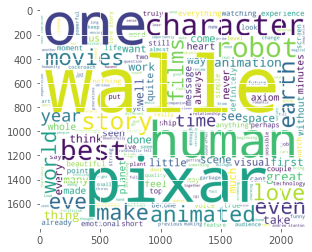

In [61]:
# WordCloud can be performed on the string inputs.
# Corpus level word cloud

wordcloud_ip = WordCloud(background_color='White',
                      width=2200,
                      height=1800
                     ).generate(ip_rev_feeds)
plt.imshow(wordcloud_ip)

In [62]:
# Remove single quote early since it causes problems with the tokenizer.
ip_rev_feeds = ip_rev_feeds.replace("'", "")


### Keyword Extraction with High Diversity Threshold

In [63]:
#KeyBERT: a BERT-powered keyword extraction technique :Maximal Marginal Relevance (MMR)
from keybert import KeyBERT
kw_model = KeyBERT()
kw_model.extract_keywords(ip_rev_feeds, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_mmr=True, diversity=0.7)

[('popular films art', 0.5654),
 ('walle defined word', 0.1936),
 ('making refreshing change', 0.0704),
 ('satisfaction testament level', 0.0656),
 ('planet equipment fail', 0.0533)]

### Keyword Extraction with Low Diversity Threshold

In [64]:
kw_model.extract_keywords(ip_rev_feeds, keyphrase_ngram_range=(3, 3), stop_words='english',
                              use_mmr=True, diversity=0.2)

[('popular films art', 0.5654),
 ('homages great films', 0.5318),
 ('considering animated films', 0.5252),
 ('hallmark animated filmsthe', 0.5005),
 ('creativity movies watch', 0.4956)]

### Tokenization and Sentiment Analysis

In [65]:
tokens = nltk.word_tokenize(ip_rev_feeds)
ip_rev_feeds1 = nltk.Text(tokens)

In [66]:
#lemmetization
WNL = nltk.WordNetLemmatizer()

In [67]:
# Take only non-empty entries
text_content = [s for s in ip_rev_feeds1 if len(s) != 0]

# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]


In [68]:
#Unigram
unigram = []
n = 1
unigrams = ngrams(text_content, n)
for item in unigrams:
      print(item)

('say',)
('popular',)
('film',)
('can',)
('not',)
('art',)
('anything',)
('proof',)
('popular',)
('film',)
('stunningly',)
('high',)
('quality',)
('beauty',)
('animation',)
('writing',)
('music',)
('sound',)
('design',)
('walle',)
('walle',)
('eclipse',)
('even',)
('andrew',)
('stanton',)
('toy',)
('story',)
('toy',)
('story',)
('pixar',)
('pantheon',)
('perhaps',)
('pixars',)
('best',)
('date',)
('call',)
('crazy',)
('ive',)
('seen',)
('contender',)
('title',)
('best',)
('animated',)
('periodwalle',)
('everything',)
('weve',)
('come',)
('expect',)
('pixar',)
('colorful',)
('vibrant',)
('imaginative',)
('exciting',)
('involving',)
('beautiful',)
('importantly',)
('interesting',)
('involving',)
('character',)
('sure',)
('walle',)
('adorable',)
('much',)
('credit',)
('animator',)
('get',)
('would',)
('nothing',)
('without',)
('stanton',)
('screenplay',)
('feature',)
('little',)
('dialogue',)
('still',)
('notably',)
('intelligent',)
('surprisingly',)
('subtle',)
('making',)
('refreshing',

('chance',)
('realize',)
('dream',)
('learned',)
('love',)
('watching',)
('dull',)
('old',)
('disneylike',)
('musical',)
('one',)
('forgettable',)
('thing',)
('child',)
('hated',)
('frequently',)
('brought',)
('parent',)
('established',)
('sentient',)
('loving',)
('soul',)
('one',)
('day',)
('slick',)
('rocket',)
('ship',)
('drop',)
('probe',)
('garbage',)
('infested',)
('landscape',)
('porcelainlike',)
('egg',)
('shaped',)
('beauty',)
('deadly',)
('capability',)
('needed',)
('selfpreservation',)
('critter',)
('egg',)
('shaped',)
('unlike',)
('walles',)
('dumpy',)
('presence',)
('fall',)
('love',)
('definitely',)
('quite',)
('feminine',)
('like',)
('desperate',)
('male',)
('impress',)
('almost',)
('expense',)
('existence',)
('interesting',)
('aspect',)
('human',)
('element',)
('humanity',)
('devolved',)
('fat',)
('slovenly',)
('lump',)
('thought',)
('ambition',)
('walle',)
('show',)
('spaceship',)
('throw',)
('wrench',)
('work',)
('little',)
('commentary',)
('inadequate',)
('mainly',)


In [69]:
bigrams_list = list(nltk.bigrams(text_content))
# we can show and print ot
print(bigrams_list)

[('say', 'popular'), ('popular', 'film'), ('film', 'can'), ('can', 'not'), ('not', 'art'), ('art', 'anything'), ('anything', 'proof'), ('proof', 'popular'), ('popular', 'film'), ('film', 'stunningly'), ('stunningly', 'high'), ('high', 'quality'), ('quality', 'beauty'), ('beauty', 'animation'), ('animation', 'writing'), ('writing', 'music'), ('music', 'sound'), ('sound', 'design'), ('design', 'walle'), ('walle', 'walle'), ('walle', 'eclipse'), ('eclipse', 'even'), ('even', 'andrew'), ('andrew', 'stanton'), ('stanton', 'toy'), ('toy', 'story'), ('story', 'toy'), ('toy', 'story'), ('story', 'pixar'), ('pixar', 'pantheon'), ('pantheon', 'perhaps'), ('perhaps', 'pixars'), ('pixars', 'best'), ('best', 'date'), ('date', 'call'), ('call', 'crazy'), ('crazy', 'ive'), ('ive', 'seen'), ('seen', 'contender'), ('contender', 'title'), ('title', 'best'), ('best', 'animated'), ('animated', 'periodwalle'), ('periodwalle', 'everything'), ('everything', 'weve'), ('weve', 'come'), ('come', 'expect'), ('ex

In [70]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

['say popular', 'popular film', 'film can', 'can not', 'not art', 'art anything', 'anything proof', 'proof popular', 'popular film', 'film stunningly', 'stunningly high', 'high quality', 'quality beauty', 'beauty animation', 'animation writing', 'writing music', 'music sound', 'sound design', 'design walle', 'walle walle', 'walle eclipse', 'eclipse even', 'even andrew', 'andrew stanton', 'stanton toy', 'toy story', 'story toy', 'toy story', 'story pixar', 'pixar pantheon', 'pantheon perhaps', 'perhaps pixars', 'pixars best', 'best date', 'date call', 'call crazy', 'crazy ive', 'ive seen', 'seen contender', 'contender title', 'title best', 'best animated', 'animated periodwalle', 'periodwalle everything', 'everything weve', 'weve come', 'come expect', 'expect pixar', 'pixar colorful', 'colorful vibrant', 'vibrant imaginative', 'imaginative exciting', 'exciting involving', 'involving beautiful', 'beautiful importantly', 'importantly interesting', 'interesting involving', 'involving chara

In [71]:
# Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

{'say popular': 2516,
 'popular film': 2222,
 'film can': 1096,
 'can not': 358,
 'not art': 1965,
 'art anything': 168,
 'anything proof': 145,
 'proof popular': 2289,
 'film stunningly': 1106,
 'stunningly high': 2861,
 'high quality': 1332,
 'quality beauty': 2316,
 'beauty animation': 236,
 'animation writing': 136,
 'writing music': 3392,
 'music sound': 1913,
 'sound design': 2726,
 'design walle': 692,
 'walle walle': 3239,
 'walle eclipse': 3196,
 'eclipse even': 833,
 'even andrew': 939,
 'andrew stanton': 108,
 'stanton toy': 2783,
 'toy story': 3060,
 'story toy': 2839,
 'story pixar': 2830,
 'pixar pantheon': 2161,
 'pantheon perhaps': 2083,
 'perhaps pixars': 2120,
 'pixars best': 2174,
 'best date': 271,
 'date call': 648,
 'call crazy': 351,
 'crazy ive': 601,
 'ive seen': 1521,
 'seen contender': 2581,
 'contender title': 569,
 'title best': 3032,
 'best animated': 267,
 'animated periodwalle': 115,
 'periodwalle everything': 2124,
 'everything weve': 982,
 'weve come':

In [72]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

[('love story', 6), ('one best', 6), ('andrew stanton', 5), ('walle eve', 5), ('ever seen', 4), ('pixar movie', 4), ('sound effect', 4), ('animated film', 4), ('main character', 4), ('space odyssey', 3), ('finding nemo', 3), ('hello dolly', 3), ('character ever', 3), ('story walle', 3), ('fall love', 3), ('character walle', 3), ('one walle', 3), ('popular film', 2), ('walle walle', 2), ('toy story', 2), ('pixars best', 2), ('best date', 2), ('ive seen', 2), ('title best', 2), ('best animated', 2), ('come expect', 2), ('expect pixar', 2), ('beautiful importantly', 2), ('little dialogue', 2), ('message delivered', 2), ('science fiction', 2), ('havent seen', 2), ('human ship', 2), ('surprising walle', 2), ('pixar film', 2), ('pixar animation', 2), ('movie always', 2), ('state art', 2), ('compared previous', 2), ('two protagonist', 2), ('word spoken', 2), ('robot character', 2), ('well done', 2), ('sigourney weaver', 2), ('walle tell', 2), ('review walle', 2), ('pixar fan', 2), ('time see'

In [73]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

# tokenization and stemming
def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string 
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
    
    #exclude stopwords from stemmed words
    stems = [stemmer.stem(t) for t in filtered_tokens if word not in stopwords]
    return stems


In [74]:
# use the first 50 rows 
#data = review_df.loc[:50, 'Review'].tolist()
#len(data)

In [75]:
tokenization_and_stemming(ReviewFeeds[2])

['day',
 'still',
 'favorit',
 'pixar',
 'anim',
 'stellar',
 'heartwarm',
 'funni',
 'prove',
 'pixar',
 'movi',
 'alway',
 'bound',
 'great',
 'except',
 'car',
 'that',
 'differ',
 'stori',
 'shot',
 'titl',
 'best',
 'centuri']

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
# define vectorizer parameters
# TfidfVectorizer will help us to create tf-idf matrix
# max_df : maximum document frequency for the given word
# min_df : minimum document frequency for the given word
# max_features: maximum number of words
# use_idf: if not true, we only calculate tf
# stop_words : built-in stop words
# tokenizer: how to tokenize the document
# ngram_range: (min_value, max_value), eg. (1, 3) means the result will include 1-gram, 2-gram, 3-gram
tfidf_model = TfidfVectorizer(max_df=0.99, max_features=1000,
                                 min_df=0.01, use_idf=True, stop_words = stopwords,
                              tokenizer=tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix = tfidf_model.fit_transform(ReviewFeeds) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " reviews and " + str(tfidf_matrix.shape[1]) + " terms.")


In total, there are 25 reviews and 1000 terms.


In [77]:
# check the parameters
tfidf_model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.99,
 'max_features': 1000,
 'min_df': 0.01,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  

In [78]:
tfidf_matrix.todense()

matrix([[0.        , 0.05138778, 0.        , ..., 0.        , 0.06379089,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.1155355 , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [79]:
# words
tf_selected_words = tfidf_model.get_feature_names()

In [80]:
tf_selected_words

['abandon',
 'absolut',
 'act',
 'action',
 'actual',
 'ad',
 'add',
 'admit',
 'ador',
 'advanc',
 'alien',
 'alloc',
 'almost',
 'alon',
 'alreadi',
 'also',
 'alway',
 'amaz',
 'among',
 'andrew',
 'anim',
 'anoth',
 'anyth',
 'appeal',
 'appl',
 'arent',
 'around',
 'art',
 'artist',
 'asimov',
 'aspect',
 'audienc',
 'away',
 'axiom',
 'back',
 'basic',
 'beauti',
 'becom',
 'begin',
 'behind',
 'believ',
 'ben',
 'best',
 'better',
 'big',
 'bigger',
 'bit',
 'blue',
 'bond',
 'boot',
 'break',
 'breathtak',
 'brilliant',
 'bring',
 'broken',
 'brought',
 'build',
 'burtt',
 'busi',
 'buy',
 'call',
 'cant',
 'capabl',
 'captiv',
 'car',
 'care',
 'carri',
 'case',
 'caus',
 'centuri',
 'certain',
 'cgi',
 'chanc',
 'chang',
 'charact',
 'charm',
 'cheap',
 'check',
 'child',
 'children',
 'choic',
 'cinema',
 'cinemat',
 'civil',
 'class',
 'clean',
 'close',
 'cockroach',
 'collect',
 'collector',
 'color',
 'colour',
 'combin',
 'come',
 'comedian',
 'comment',
 'commentari',


In [81]:
# k-means clustering
from sklearn.cluster import KMeans

num_clusters = 5

# number of clusters
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [83]:
# create DataFrame films from all of the input files.
product = { 'Review': cleaned_df[:25].Review_clean_no_stopwords, 'cluster': clusters}
frame = pd.DataFrame(product, columns = ['Review', 'cluster'])

In [84]:
frame.head(10)

,Review,cluster
0,best trilogy sealed best possible way,0
1,threads tolkiens magnum opus come together ele...,0
2,wonderful every level love characters special ...,4
3,greatest tragedy human race never make better ...,0
4,admit love three lord rings films people may s...,0
5,,0
6,obviously im aware fact lord rings trilogy act...,0
7,,0
8,,2
9,awe knowledge reviewers ive disappointed virtu...,0


In [85]:
print ("Number of reviews included in each cluster:")
frame['cluster'].value_counts().to_frame()

Number of reviews included in each cluster:


,cluster
0,21
4,1
2,1
1,1
3,1


In [86]:
km.cluster_centers_

array([[0.00149905, 0.01039474, 0.00831779, ..., 0.00550169, 0.00303766,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.18894473],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [87]:
km.cluster_centers_.shape

(5, 1000)

In [88]:
print ("<Document clustering result by K-means>")

#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :5]: #5 words per cluster
        Cluster_keywords_summary[i].append(tf_selected_words[ind])
        print (tf_selected_words[ind] + ",", end='')
    print ()
    
    cluster_reviews = frame[frame.cluster==i].Review.tolist()
    print ("Cluster " + str(i) + " Reviews (" + str(len(cluster_reviews)) + " Reviews): ")

<Document clustering result by K-means>
Cluster 0 words:wall,pixar,one,human,anim,
Cluster 0 Reviews (21 Reviews): 
Cluster 1 words:review,wall,somewhat,saturn,case,
Cluster 1 Reviews (1 Reviews): 
Cluster 2 words:eve,wall,earth,deplet,corpor,
Cluster 2 Reviews (1 Reviews): 
Cluster 3 words:best,one,nemo,fan,behind,
Cluster 3 Reviews (1 Reviews): 
Cluster 4 words:shot,prove,stellar,titl,except,
Cluster 4 Reviews (1 Reviews): 


In [89]:
num_clusters_7 = 2

# number of clusters
km2 = KMeans(n_clusters=num_clusters_7)
km2.fit(tfidf_matrix)

clusters_7 = km2.labels_.tolist()

In [91]:
# create another DataFrame films from all of the input files for 2 clusters
product2 = { 'Review': cleaned_df[:25].Review_clean_no_stopwords, 'cluster': clusters_7}
frame2 = pd.DataFrame(product2, columns = ['Review', 'cluster'])

In [92]:
frame2.head(10)

,Review,cluster
0,best trilogy sealed best possible way,1
1,threads tolkiens magnum opus come together ele...,0
2,wonderful every level love characters special ...,0
3,greatest tragedy human race never make better ...,1
4,admit love three lord rings films people may s...,1
5,,0
6,obviously im aware fact lord rings trilogy act...,0
7,,0
8,,1
9,awe knowledge reviewers ive disappointed virtu...,0


In [93]:
print ("Number of reviews included in each cluster:")
frame2['cluster'].value_counts().to_frame()

Number of reviews included in each cluster:


,cluster
1,14
0,11


In [94]:
km2.cluster_centers_

array([[0.        , 0.01194417, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00224858, 0.00620741, 0.01247668, ..., 0.00825254, 0.00455649,
        0.01349605]])

In [95]:
print ("<Document clustering result by K-means>")

#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items.
order_centroids_2 = km2.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary_2 = {}
for i in range(num_clusters_7):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary_2[i] = []
    for ind in order_centroids_2[i, :5]: #5 words per cluster
        Cluster_keywords_summary_2[i].append(tf_selected_words[ind])
        print (tf_selected_words[ind] + ",", end='')
    print ()
    cluster_reviews_2 = frame2[frame2.cluster==i].Review.tolist()
    print ("Cluster " + str(i) + " reviews (" + str(len(cluster_reviews_2)) + " reviews): ")

<Document clustering result by K-means>
Cluster 0 words:pixar,go,best,cant,favorit,
Cluster 0 reviews (11 reviews): 
Cluster 1 words:wall,one,pixar,human,love,
Cluster 1 reviews (14 reviews): 


### LDA

In [96]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5)

In [97]:
# document topic matrix for tfidf_matrix_lda
lda_output = lda.fit_transform(tfidf_matrix)
print(lda_output.shape)
print(lda_output)

(25, 5)
[[0.01585457 0.01555385 0.01546646 0.0157722  0.93735292]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.0389889  0.84576759 0.03835883 0.03850861 0.03837607]
 [0.01914895 0.01849433 0.92481173 0.01888939 0.0186556 ]
 [0.92236236 0.01938519 0.01933663 0.01948466 0.01943115]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.02659364 0.89423481 0.02623239 0.02655586 0.0263833 ]
 [0.91571591 0.0210499  0.02098849 0.02117385 0.02107185]
 [0.01906685 0.01892711 0.01887109 0.92412236 0.01901258]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.01382888 0.01359203 0.01353501 0.01378573 0.94525836]
 [0.89596538 0.02602338 0.02593876 0.02609324 0.02597925]
 [0.2        0.2        0.2        0.2        0.2       ]
 [0.01853476 0.92654321 0.01814484 0.01846196 0.01831523]
 [0.88748846 0.02813866 0.02800361 0.02817966 0.02818962]
 [0.01755714 0.01739896 0.01736267 0.93021468 0.01746656]
 [0.02223531 0.02210627 0.0220748  0.02231063 0.91127299]
 [0.02

In [98]:
# topics and words matrix
topic_word = lda.components_
print(topic_word.shape)
print(topic_word)

(5, 1000)
[[0.20000535 0.20002165 0.20001732 ... 0.31548557 0.20000861 0.20000721]
 [0.2000057  0.20002281 0.20001695 ... 0.20001308 0.20000871 0.38891603]
 [0.20000596 0.20002328 0.28497422 ... 0.20001322 0.20000891 0.2000076 ]
 [0.23145756 0.3313355  0.28964853 ... 0.20001144 0.20000799 0.20000673]
 [0.2000055  0.28688632 0.20001651 ... 0.20001219 0.26375667 0.20000715]]


In [99]:
import numpy as np

In [101]:
# column names
topic_names = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
doc_names = ["Doc" + str(i) for i in range(len(ReviewFeeds))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)

# get dominant topic for each document
topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['topic'] = topic
df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,topic
Doc0,0.02,0.02,0.02,0.02,0.94,4
Doc1,0.20,0.20,0.20,0.20,0.20,0
Doc2,0.04,0.85,0.04,0.04,0.04,1
Doc3,0.02,0.02,0.92,0.02,0.02,2
Doc4,0.92,0.02,0.02,0.02,0.02,0
Doc5,0.20,0.20,0.20,0.20,0.20,0
Doc6,0.03,0.89,0.03,0.03,0.03,1
Doc7,0.92,0.02,0.02,0.02,0.02,0
Doc8,0.02,0.02,0.02,0.92,0.02,3
Doc9,0.20,0.20,0.20,0.20,0.20,0


In [102]:
df_document_topic['topic'].value_counts().to_frame()

,topic
0,13
3,5
4,3
1,3
2,1


In [103]:
# topic word matrix
print(lda.components_)
# topic-word matrix
df_topic_words = pd.DataFrame(lda.components_)

# column and index
df_topic_words.columns = tfidf_model.get_feature_names()
df_topic_words.index = topic_names

df_topic_words.head()

[[0.20000535 0.20002165 0.20001732 ... 0.31548557 0.20000861 0.20000721]
 [0.2000057  0.20002281 0.20001695 ... 0.20001308 0.20000871 0.38891603]
 [0.20000596 0.20002328 0.28497422 ... 0.20001322 0.20000891 0.2000076 ]
 [0.23145756 0.3313355  0.28964853 ... 0.20001144 0.20000799 0.20000673]
 [0.2000055  0.28688632 0.20001651 ... 0.20001219 0.26375667 0.20000715]]


,abandon,absolut,act,action,actual,ad,add,admit,ador,advanc,...,writer,written,wrong,year,yes,yet,youll,young,yourselffrom,youv
Topic0,0.200005,0.200022,0.200017,0.324862,0.200019,0.287769,0.200006,0.292681,0.200029,0.287840,...,0.315127,0.340945,0.200009,0.568728,0.302349,0.274871,0.291603,0.315486,0.200009,0.200007
Topic1,0.200006,0.200023,0.200017,0.200036,0.200020,0.200021,0.200007,0.200023,0.200030,0.200020,...,0.200011,0.200011,0.294436,0.248869,0.283708,0.200041,0.276119,0.200013,0.200009,0.388916
Topic2,0.200006,0.200023,0.284974,0.271238,0.200021,0.200022,0.200007,0.200023,0.277279,0.200021,...,0.200011,0.200012,0.200010,0.249603,0.200023,0.262192,0.200035,0.200013,0.200009,0.200008
Topic3,0.231458,0.331335,0.289649,0.223357,0.372166,0.345223,0.200006,0.372162,0.270264,0.244800,...,0.200009,0.200011,0.200009,0.390515,0.200020,0.285962,0.240722,0.200011,0.200008,0.200007
Topic4,0.200006,0.286886,0.200017,0.265506,0.251297,0.200020,0.332239,0.200021,0.251361,0.200019,...,0.200010,0.200011,0.200009,0.232925,0.200022,0.269985,0.200033,0.200012,0.263757,0.200007


In [104]:
# print top n keywords for each topic
def print_topic_words(tfidf_model, lda_model, n_words):
    words = np.array(tfidf_model.get_feature_names())
    topic_words = []
    # for each topic, we have words weight
    for topic_words_weights in lda_model.components_:
        top_words = topic_words_weights.argsort()[::-1][:n_words]
        topic_words.append(words.take(top_words))
    return topic_words

topic_keywords = print_topic_words(tfidf_model=tfidf_model, lda_model=lda, n_words=15)        

df_topic_words = pd.DataFrame(topic_keywords)
df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
df_topic_words.index = ['Topic '+str(i) for i in range(df_topic_words.shape[0])]
df_topic_words

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,pixar,wall,one,best,stori,anim,true,look,mani,year,see,style,ratatouill,charact,fan
Topic 1,pixar,best,prove,stellar,shot,funni,go,centuri,day,except,titl,movi,review,favorit,car
Topic 2,love,effect,remind,eve,charact,stori,pixar,wall,charm,movi,word,job,sound,quit,done
Topic 3,wall,make,one,earth,human,eve,take,robot,planet,world,cant,even,see,would,plant
Topic 4,wall,love,human,charact,import,work,thing,beauti,egg,shape,experi,quit,exist,kind,robot


In [105]:
!pip install twython

Defaulting to user installation because normal site-packages is not writeable


In [106]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from textblob import TextBlob

In [107]:
# double check if the original df has duplicates
review_df.drop_duplicates(subset ="Review", inplace = True)

In [108]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 498
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   MovieName                  383 non-null    object
 1   Review                     383 non-null    object
 2   Review_clean               383 non-null    object
 3   Review_clean_no_stopwords  383 non-null    object
dtypes: object(4)
memory usage: 15.0+ KB


In [109]:
review_df['Review'] = review_df['Review'].astype('str')
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
review_df['Polarity'] = review_df['Review'].apply(get_polarity)

In [110]:
review_df.head(10)

,MovieName,Review,Review_clean,Review_clean_no_stopwords,Polarity
0,The Lord of the Rings: The Return of the King,Best movie in the trilogy and sealed in the be...,best movie in the trilogy and sealed in the be...,best trilogy sealed best possible way,0.666667
1,The Lord of the Rings: The Return of the King,All the threads of Tolkien's magnum opus come ...,all the threads of tolkiens magnum opus come t...,threads tolkiens magnum opus come together ele...,0.186645
2,The Lord of the Rings: The Return of the King,Wonderful on every level. Love the characters ...,wonderful on every level love the characters a...,wonderful every level love characters special ...,0.465306
3,The Lord of the Rings: The Return of the King,The greatest tragedy of the human race is that...,the greatest tragedy of the human race is that...,greatest tragedy human race never make better ...,0.500000
4,The Lord of the Rings: The Return of the King,"I admit it, I love all three Lord of the Rings...",i admit it i love all three lord of the rings ...,admit love three lord rings films people may s...,0.376751
5,The Lord of the Rings: The Return of the King,,,,0.000000
6,The Lord of the Rings: The Return of the King,"Obviously, I'm aware of the fact that the Lord...",obviously im aware of the fact that the lord o...,obviously im aware fact lord rings trilogy act...,0.203977
9,The Lord of the Rings: The Return of the King,I am in awe of the knowledge of some of the re...,i am in awe of the knowledge of some of the re...,awe knowledge reviewers ive disappointed virtu...,-0.039665
11,The Lord of the Rings: The Return of the King,Just as Peter Jackson felt that LOTR had to be...,just as peter jackson felt that lotr had to be...,peter jackson felt lotr made one large threepa...,0.229675
12,The Lord of the Rings: The Return of the King,"Feeling weary and battle-worn, I have just sta...",feeling weary and battleworn i have just stagg...,feeling weary battleworn staggered cinema thre...,0.164010


In [111]:
review_df['Sentiment_Type']=''
review_df.loc[review_df.Polarity>0.1,'Sentiment_Type']='POSITIVE'
review_df.loc[(review_df.Polarity < 0.1) & (review_df.Polarity >= 0),'Sentiment_Type']='NEUTRAL'
review_df.loc[review_df.Polarity<0,'Sentiment_Type']='NEGATIVE'

In [112]:
review_df.head(10)

,MovieName,Review,Review_clean,Review_clean_no_stopwords,Polarity,Sentiment_Type
0,The Lord of the Rings: The Return of the King,Best movie in the trilogy and sealed in the be...,best movie in the trilogy and sealed in the be...,best trilogy sealed best possible way,0.666667,POSITIVE
1,The Lord of the Rings: The Return of the King,All the threads of Tolkien's magnum opus come ...,all the threads of tolkiens magnum opus come t...,threads tolkiens magnum opus come together ele...,0.186645,POSITIVE
2,The Lord of the Rings: The Return of the King,Wonderful on every level. Love the characters ...,wonderful on every level love the characters a...,wonderful every level love characters special ...,0.465306,POSITIVE
3,The Lord of the Rings: The Return of the King,The greatest tragedy of the human race is that...,the greatest tragedy of the human race is that...,greatest tragedy human race never make better ...,0.500000,POSITIVE
4,The Lord of the Rings: The Return of the King,"I admit it, I love all three Lord of the Rings...",i admit it i love all three lord of the rings ...,admit love three lord rings films people may s...,0.376751,POSITIVE
5,The Lord of the Rings: The Return of the King,,,,0.000000,NEUTRAL
6,The Lord of the Rings: The Return of the King,"Obviously, I'm aware of the fact that the Lord...",obviously im aware of the fact that the lord o...,obviously im aware fact lord rings trilogy act...,0.203977,POSITIVE
9,The Lord of the Rings: The Return of the King,I am in awe of the knowledge of some of the re...,i am in awe of the knowledge of some of the re...,awe knowledge reviewers ive disappointed virtu...,-0.039665,NEGATIVE
11,The Lord of the Rings: The Return of the King,Just as Peter Jackson felt that LOTR had to be...,just as peter jackson felt that lotr had to be...,peter jackson felt lotr made one large threepa...,0.229675,POSITIVE
12,The Lord of the Rings: The Return of the King,"Feeling weary and battle-worn, I have just sta...",feeling weary and battleworn i have just stagg...,feeling weary battleworn staggered cinema thre...,0.164010,POSITIVE


<AxesSubplot:title={'center':'Sentiment Analysis'}>

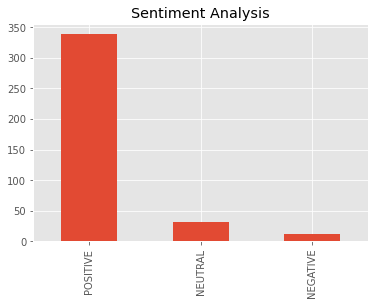

In [113]:
review_df.Sentiment_Type.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [114]:
#nltk.download('vader_lexicon')
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

Defaulting to user installation because normal site-packages is not writeable


In [115]:
review_df['VADER_scores'] = review_df['Review'].apply(lambda Review: sid.polarity_scores(Review))
review_df.head(10)

,MovieName,Review,Review_clean,Review_clean_no_stopwords,Polarity,Sentiment_Type,VADER_scores
0,The Lord of the Rings: The Return of the King,Best movie in the trilogy and sealed in the be...,best movie in the trilogy and sealed in the be...,best trilogy sealed best possible way,0.666667,POSITIVE,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp..."
1,The Lord of the Rings: The Return of the King,All the threads of Tolkien's magnum opus come ...,all the threads of tolkiens magnum opus come t...,threads tolkiens magnum opus come together ele...,0.186645,POSITIVE,"{'neg': 0.044, 'neu': 0.79, 'pos': 0.166, 'com..."
2,The Lord of the Rings: The Return of the King,Wonderful on every level. Love the characters ...,wonderful on every level love the characters a...,wonderful every level love characters special ...,0.465306,POSITIVE,"{'neg': 0.066, 'neu': 0.597, 'pos': 0.337, 'co..."
3,The Lord of the Rings: The Return of the King,The greatest tragedy of the human race is that...,the greatest tragedy of the human race is that...,greatest tragedy human race never make better ...,0.500000,POSITIVE,"{'neg': 0.235, 'neu': 0.621, 'pos': 0.145, 'co..."
4,The Lord of the Rings: The Return of the King,"I admit it, I love all three Lord of the Rings...",i admit it i love all three lord of the rings ...,admit love three lord rings films people may s...,0.376751,POSITIVE,"{'neg': 0.041, 'neu': 0.685, 'pos': 0.274, 'co..."
5,The Lord of the Rings: The Return of the King,,,,0.000000,NEUTRAL,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
6,The Lord of the Rings: The Return of the King,"Obviously, I'm aware of the fact that the Lord...",obviously im aware of the fact that the lord o...,obviously im aware fact lord rings trilogy act...,0.203977,POSITIVE,"{'neg': 0.079, 'neu': 0.802, 'pos': 0.119, 'co..."
9,The Lord of the Rings: The Return of the King,I am in awe of the knowledge of some of the re...,i am in awe of the knowledge of some of the re...,awe knowledge reviewers ive disappointed virtu...,-0.039665,NEGATIVE,"{'neg': 0.093, 'neu': 0.829, 'pos': 0.078, 'co..."
11,The Lord of the Rings: The Return of the King,Just as Peter Jackson felt that LOTR had to be...,just as peter jackson felt that lotr had to be...,peter jackson felt lotr made one large threepa...,0.229675,POSITIVE,"{'neg': 0.032, 'neu': 0.795, 'pos': 0.173, 'co..."
12,The Lord of the Rings: The Return of the King,"Feeling weary and battle-worn, I have just sta...",feeling weary and battleworn i have just stagg...,feeling weary battleworn staggered cinema thre...,0.164010,POSITIVE,"{'neg': 0.106, 'neu': 0.723, 'pos': 0.172, 'co..."


In [116]:
review_df['compound'] = review_df['VADER_scores'].apply(lambda score_dict: score_dict['compound'])
review_df.head(5)

,MovieName,Review,Review_clean,Review_clean_no_stopwords,Polarity,Sentiment_Type,VADER_scores,compound
0,The Lord of the Rings: The Return of the King,Best movie in the trilogy and sealed in the be...,best movie in the trilogy and sealed in the be...,best trilogy sealed best possible way,0.666667,POSITIVE,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...",0.8555
1,The Lord of the Rings: The Return of the King,All the threads of Tolkien's magnum opus come ...,all the threads of tolkiens magnum opus come t...,threads tolkiens magnum opus come together ele...,0.186645,POSITIVE,"{'neg': 0.044, 'neu': 0.79, 'pos': 0.166, 'com...",0.9955
2,The Lord of the Rings: The Return of the King,Wonderful on every level. Love the characters ...,wonderful on every level love the characters a...,wonderful every level love characters special ...,0.465306,POSITIVE,"{'neg': 0.066, 'neu': 0.597, 'pos': 0.337, 'co...",0.9156
3,The Lord of the Rings: The Return of the King,The greatest tragedy of the human race is that...,the greatest tragedy of the human race is that...,greatest tragedy human race never make better ...,0.500000,POSITIVE,"{'neg': 0.235, 'neu': 0.621, 'pos': 0.145, 'co...",-0.3830
4,The Lord of the Rings: The Return of the King,"I admit it, I love all three Lord of the Rings...",i admit it i love all three lord of the rings ...,admit love three lord rings films people may s...,0.376751,POSITIVE,"{'neg': 0.041, 'neu': 0.685, 'pos': 0.274, 'co...",0.9992


In [117]:
review_df['sentiment_VADER']=''
review_df.loc[review_df.compound>0,'sentiment_VADER']='POSITIVE'
review_df.loc[review_df.compound==0,'sentiment_VADER']='NEUTRAL'
review_df.loc[review_df.compound<0,'sentiment_VADER']='NEGATIVE'

In [118]:
review_df.head(5)

,MovieName,Review,Review_clean,Review_clean_no_stopwords,Polarity,Sentiment_Type,VADER_scores,compound,sentiment_VADER
0,The Lord of the Rings: The Return of the King,Best movie in the trilogy and sealed in the be...,best movie in the trilogy and sealed in the be...,best trilogy sealed best possible way,0.666667,POSITIVE,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...",0.8555,POSITIVE
1,The Lord of the Rings: The Return of the King,All the threads of Tolkien's magnum opus come ...,all the threads of tolkiens magnum opus come t...,threads tolkiens magnum opus come together ele...,0.186645,POSITIVE,"{'neg': 0.044, 'neu': 0.79, 'pos': 0.166, 'com...",0.9955,POSITIVE
2,The Lord of the Rings: The Return of the King,Wonderful on every level. Love the characters ...,wonderful on every level love the characters a...,wonderful every level love characters special ...,0.465306,POSITIVE,"{'neg': 0.066, 'neu': 0.597, 'pos': 0.337, 'co...",0.9156,POSITIVE
3,The Lord of the Rings: The Return of the King,The greatest tragedy of the human race is that...,the greatest tragedy of the human race is that...,greatest tragedy human race never make better ...,0.500000,POSITIVE,"{'neg': 0.235, 'neu': 0.621, 'pos': 0.145, 'co...",-0.3830,NEGATIVE
4,The Lord of the Rings: The Return of the King,"I admit it, I love all three Lord of the Rings...",i admit it i love all three lord of the rings ...,admit love three lord rings films people may s...,0.376751,POSITIVE,"{'neg': 0.041, 'neu': 0.685, 'pos': 0.274, 'co...",0.9992,POSITIVE


<AxesSubplot:title={'center':'sentiment analysis_VADER'}>

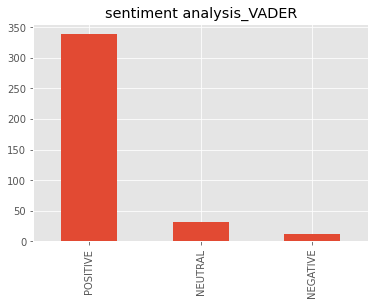

In [119]:
review_df.Sentiment_Type .value_counts().plot(kind='bar',title="sentiment analysis_VADER")

In [120]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 498
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MovieName                  383 non-null    object 
 1   Review                     383 non-null    object 
 2   Review_clean               383 non-null    object 
 3   Review_clean_no_stopwords  383 non-null    object 
 4   Polarity                   383 non-null    float64
 5   Sentiment_Type             383 non-null    object 
 6   VADER_scores               383 non-null    object 
 7   compound                   383 non-null    float64
 8   sentiment_VADER            383 non-null    object 
dtypes: float64(2), object(7)
memory usage: 29.9+ KB


In [121]:
!pip install rake-nltk

Defaulting to user installation because normal site-packages is not writeable


In [122]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [123]:
# converting reviews column into list
a = list(review_df['Review'])
  
# converting list into string and then joining it with space
b = ' '.join(str(e) for e in a)
  
# printing result
print(b)

Best movie in the trilogy and sealed in the best possible way All the threads of Tolkien's magnum opus come together in the most elegant of fashions in the final part of Peter Jackson's adaptation. Humanity makes a last stand at Minas Tirith, the Hobbits travel through Mordor, our heroes try to by time for Frodo to complete his mission and the Evil Sauron gets tired of the whole game and lashes out with all his might and fury.

"Return of the King" is 4 hours of payoff, a third act in a gigantic epic rather than a mere film of its own. As such it is intensely dramatic and dynamic and you can very much sense that though peter Jackson spared no effort on the previous episodes, this is clearly his favorite. the film floats by at a thunderous pace, taking us through unforgettable moments such as the battle of Minas Tirith itself, a marvel of seamless animation and epic film-making, it demands to be seen, as it has too many jaw-dropping moments to choose from. The quieter character moments 

In [128]:
import spacy
#!python -m spacy download en_core_web_md
from collections import Counter
from string import punctuation
#spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    doc = nlp(text.lower()) 
    for token in doc:
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        if(token.pos_ in pos_tag):
            result.append(token.text)
    return result
new_text = b
output = set(get_hotwords(new_text))
most_common_list = Counter(output).most_common(10)
for item in most_common_list:
  print(item[0])

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /explosion/spacy-models/master/compatibility.json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001ED2FA61340>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [129]:
!pip install rake-nltk

Defaulting to user installation because normal site-packages is not writeable


In [130]:
from rake_nltk import Rake

In [131]:
r = Rake()
text=b
r.extract_keywords_from_text(text)
r.get_ranked_phrases()

['crafty hyena goons chasing away poor simba like gangsters pursuing',
 'incredible feat enthrals anew every time cannot believe',
 'delightful opening involving elaborate booby traps informs us',
 'gracias pixar por tan hermosa pelicula',
 'galadriel galadriel tells hobbits may look like unimportant people',
 'mostly unremarkable visual effects roadshows (" avatar',
 'discerning viewers peccadilloes ), star wars stands',
 'later films would include poetically changing weather',
 'mexican holiday dia de los muertos',
 'old king cole nursery rhyme --',
 'recordist bill varney would win another oscar',
 'alien ), effects photographer dennis muren',
 'start celebrating dia de los muertos',
 'evades multiple obstacles including fearsome thugs',
 'rebellious smuggler whose personality represents tenacity',
 'sorority row ), billy dee williams',
 'film looks magical -- middle earth looks beautifully real',
 'bioluminescent dragonflies glide gently around',
 'waste allocator load lifter \x96 

In [132]:
r.get_ranked_phrases_with_scores()

[(58.02910425680882,
  'crafty hyena goons chasing away poor simba like gangsters pursuing'),
 (32.71487110365091,
  'incredible feat enthrals anew every time cannot believe'),
 (32.58434343434343,
  'delightful opening involving elaborate booby traps informs us'),
 (32.22680412371134, 'gracias pixar por tan hermosa pelicula'),
 (30.68097648125154,
  'galadriel galadriel tells hobbits may look like unimportant people'),
 (27.465677655677656,
  'mostly unremarkable visual effects roadshows (" avatar'),
 (27.339131109432547, 'discerning viewers peccadilloes ), star wars stands'),
 (27.0871068717342, 'later films would include poetically changing weather'),
 (26.57635175282234, 'mexican holiday dia de los muertos'),
 (25.990389174599702, 'old king cole nursery rhyme --'),
 (25.969675944863912, 'recordist bill varney would win another oscar'),
 (25.87904761904762, 'alien ), effects photographer dennis muren'),
 (25.60412953060012, 'start celebrating dia de los muertos'),
 (24.3253968253968

In [133]:
r = Rake(min_length=2, max_length=4)

In [134]:
# To include all phrases even the repeated ones.
#r = Rake() # Equivalent to Rake(include_repeated_phrases=True)
# To include all phrases only once and ignore the repetitions
r = Rake(include_repeated_phrases=False)
r.extract_keywords_from_text(text)
r.get_ranked_phrases()

['crafty hyena goons chasing away poor simba like gangsters pursuing',
 'incredible feat enthrals anew every time cannot believe',
 'galadriel galadriel tells hobbits may look like unimportant people',
 'delightful opening involving elaborate booby traps informs us',
 'gracias pixar por tan hermosa pelicula',
 'discerning viewers peccadilloes ), star wars stands',
 'mostly unremarkable visual effects roadshows (" avatar',
 'later films would include poetically changing weather',
 'recordist bill varney would win another oscar',
 'film looks magical -- middle earth looks beautifully real',
 'mexican holiday dia de los muertos',
 'start celebrating dia de los muertos',
 'old king cole nursery rhyme --',
 'alien ), effects photographer dennis muren',
 'every single spectacular battle scene actually oozes tension',
 'sorority row ), billy dee williams',
 'chord something strange happens ... nobody alive',
 'evades multiple obstacles including fearsome thugs',
 'rebellious smuggler whose pe